In [115]:
from google.colab import drive


In [116]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
!nvidia-smi


Wed Aug 21 18:47:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              27W /  70W |   2181MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [118]:
DATA_DIR = r'/content/drive/MyDrive/cvpr/archive/train'
DATA_DIR1 = r'/content/drive/MyDrive/cvpr/archive/test'

In [119]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [120]:
CATEGORIES_T = []

for i in os.listdir(DATA_DIR):
    CATEGORIES_T.append(i)

print(CATEGORIES_T)

['CAT', 'DOG']


In [121]:
CATEGORIES_V = []

for i in os.listdir(DATA_DIR1):
    CATEGORIES_V.append(i)

print(CATEGORIES_V)

['DOG', 'CAT']


In [122]:
class_names = ['CAT', 'DOG']

In [123]:
TRANING_DIR = []
IMG_SIZE = 224
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES_T.index(c)


    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            TRANING_DIR.append([img_resized, class_num])
        except WException as e:
            pass

print(len(TRANING_DIR))

100%|██████████| 287/287 [00:03<00:00, 82.96it/s]

565


In [124]:
IMG_SIZE = 224
VALIDATION_DIR = []
for c in CATEGORIES_T:
    path = os.path.join(DATA_DIR1, c)
    class_num = CATEGORIES_T.index(c)


    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            VALIDATION_DIR.append([img_resized, class_num])
        except WException as e:
            pass

print(len(VALIDATION_DIR))

100%|██████████| 69/69 [00:00<00:00, 81.17it/s]

138


In [125]:
random.shuffle(TRANING_DIR)
random.shuffle(VALIDATION_DIR)

In [126]:
X_train = []
Y_train = []

for img, label in TRANING_DIR:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1,224,224,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (565, 224, 224, 3) Y_train= (565,)


In [127]:
X_val = []
Y_val = []

for img, label in VALIDATION_DIR:
    X_val.append(img)
    Y_val.append(label)

X_val = np.array(X_val).astype('float32').reshape(-1,224,224,3)
Y_val = np.array(Y_val)

print(f"X_val= {X_val.shape} Y_val= {Y_val.shape}")

X_val= (138, 224, 224, 3) Y_val= (138,)


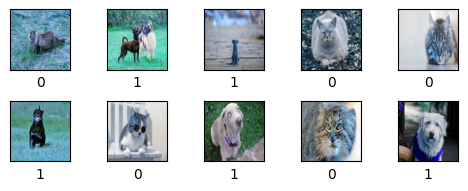

In [128]:
ROWS = 2
COLS = 5
i = 0

plt.figure(figsize=(5,2))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i].astype('uint8'))

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

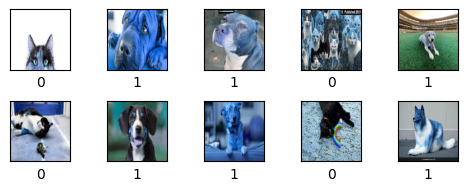

In [129]:
ROWS = 2
COLS = 5
i = 0

plt.figure(figsize=(5,2))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_val[i].astype('uint8'))

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_val[i])
        i += 1
plt.tight_layout()
plt.show()

In [130]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(224,224,3)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,826,946 (10.78 MB)

 Trainable params: 2,826,946 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [132]:

h = model.fit(x=X_train, y=Y_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.4850 - loss: 324.0545 - val_accuracy: 0.5310 - val_loss: 0.9456
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5475 - loss: 0.7272 - val_accuracy: 0.5310 - val_loss: 0.7417
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7386 - loss: 0.5822 - val_accuracy: 0.5929 - val_loss: 0.7138
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8399 - loss: 0.3714 - val_accuracy: 0.5398 - val_loss: 0.8251
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8902 - loss: 0.2757 - val_accuracy: 0.5752 - val_loss: 1.1304
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9098 - loss: 0.1745 - val_accuracy: 0.5664 - val_loss: 2.1778
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9276 - loss: 0.1908 - val_accuracy: 0.6549 - val_loss: 1.3089
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9720 - loss: 0.0865 - val_accuracy: 0.6460 

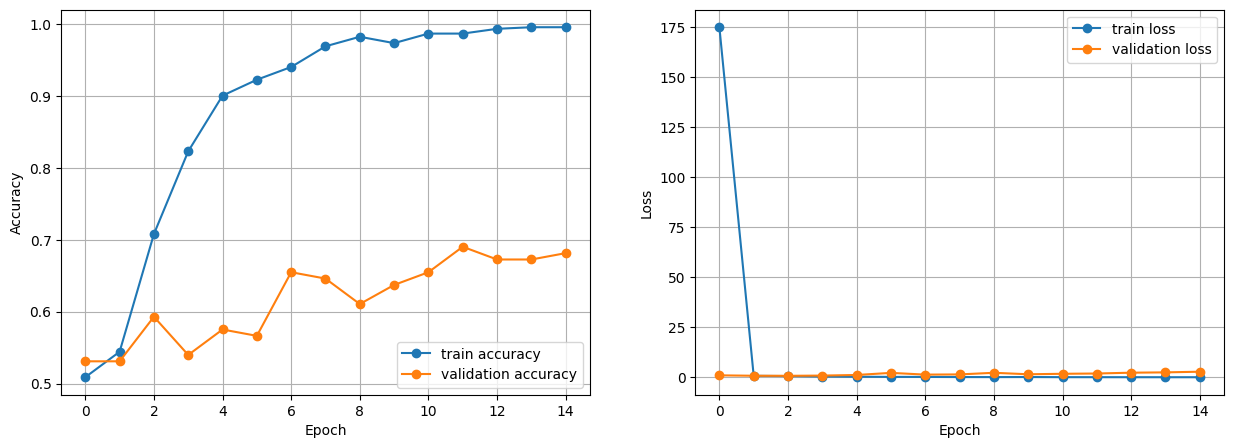

In [133]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [134]:
test_loss, test_acc = model.evaluate(X_val, Y_val)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6589 - loss: 2.8348

Test Accuracy: 0.6159420013427734

Test Loss: 3.3174660205841064


In [135]:
predictions = model.predict(X_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [136]:
predictions[0]

array([0.85588205, 0.14411795], dtype=float32)

In [137]:
np.argmax(predictions[0])

0

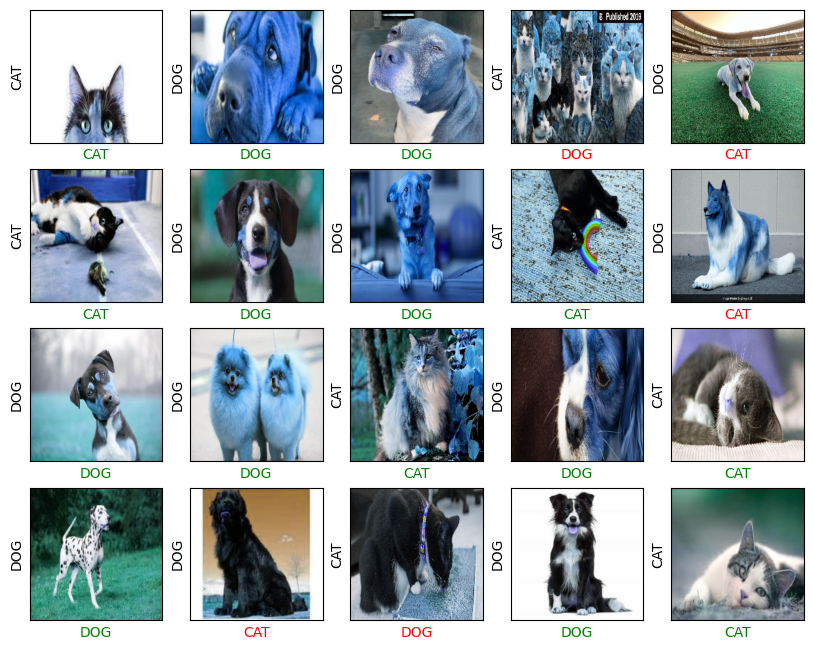

In [138]:
rows = 5
cols = 5

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(rows, cols, i+1)
    plt.imshow(X_val[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_val[i]])
    if Y_val[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()